# Project 1: SAT & ACT Analysis

## Problem Statement

Analyze data from the SAT and ACT from 2017 and 2018. The data is organized by national average participation and scores on individual tests.

By analyzing the datasets I will come up with the best state to prepare a marketing campaign to improve scores and increase revenues for the College Board, the company that prepares the SAT. 

The approach used to find the best suitable state for the task is to find states where the participation is low, do not have contracts with the SAT or ACT, follow a dowtrend from the previous years and have the possibility to impact more people.

My findings will be presented to a non-technical audience.



## Executive Summary

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

In [1]:
# importing all libraries used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# importing 2017 data
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
# printing first 10 rows of the SAT dataframe
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [4]:
# printing first 10 rows of the ACT dataframe
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [5]:
# checking the shape of the SAT data (rows and columns)
sat_2017.shape

(51, 5)

In [6]:
# checking the shape of the ACT data (rows and columns)
act_2017.shape

(52, 7)

In [7]:
# checking for null values in the SAT data
sat_2017.isnull().mean()

State                                 0.0
Participation                         0.0
Evidence-Based Reading and Writing    0.0
Math                                  0.0
Total                                 0.0
dtype: float64

In [8]:
# checking for null values in the ACT data
act_2017.isnull().mean()

State            0.0
Participation    0.0
English          0.0
Math             0.0
Reading          0.0
Science          0.0
Composite        0.0
dtype: float64

In [9]:
# checking for variable types in the SAT data
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [10]:
# checking for variable types in the SAT data
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [11]:
# checking for duplicates states in the SAT_2017 data
sat_2017[sat_2017['State'].duplicated()]

,State,Participation,Evidence-Based Reading and Writing,Math,Total


In [12]:
# checking for duplicates states in the ACT_2017 data
act_2017[act_2017['State'].duplicated()]

,State,Participation,English,Math,Reading,Science,Composite


#### 4a. Does the data look complete? 

**ANSWER**:
- The ACT DataFrame has 52 rows while the SAT DataFrame has 51 rows:
    - Extra row includes the National result. But it is only present in the ACT DataFrame
    
- There are no null values in any of the datasets
- ACT DataFrame has a composite value for the state of Wyoming of 20.2x - Needs to be fixed!

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [13]:
# minumum / maximum scores for SAT EBR
min_ebr = sat_2017['Evidence-Based Reading and Writing'].min()
min_math = sat_2017['Math'].min()
print(f'Minumum scores for the SAT were: EBR: {min_ebr} and Math: {min_math}')

max_ebr = sat_2017['Evidence-Based Reading and Writing'].max()
max_math = sat_2017['Math'].max()
print(f'Minumum scores for the SAT were: EBR: {max_ebr} and Math: {max_math}')

Minumum scores for the SAT were: EBR: 482 and Math: 52
Minumum scores for the SAT were: EBR: 644 and Math: 651


In [14]:
# minumum / maximum scores for ACT EBR
min_eng = act_2017['English'].min()
min_math = act_2017['Math'].min()
min_read = act_2017['Reading'].min()
min_sci = act_2017['Science'].min()
print(f'Minumum scores for the ACT were: \
English: {min_eng}; Math: {min_math}; Reading; {min_read} and Science; {min_sci}')

max_eng = act_2017['English'].max()
max_math = act_2017['Math'].max()
max_read = act_2017['Reading'].max()
max_sci = act_2017['Science'].max()
print(f'Minumum scores for the ACT were: \
English; {max_eng}, Math; {max_math}, Reading; {max_read} and Science; {max_sci}')
      

Minumum scores for the ACT were: English: 16.3; Math: 18.0; Reading; 18.1 and Science; 2.3
Minumum scores for the ACT were: English; 25.5, Math; 25.3, Reading; 26.0 and Science; 24.9


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [15]:
# looking into suspect lowest scores SAT
sat_2017.loc[sat_2017['Math'] == 52]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [16]:
#fixing score of 52 in Math - Should be 1060 - 536 = 524
sat_2017.loc[sat_2017['Math'] == 52,'Math'] = 524

In [17]:
# looking into suspect lowest scores ACT
act_2017.loc[act_2017['Science'] == 2.3]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [18]:
#fixing score of 52 in Math - Should be 23.8 so Composite is 23.6
act_2017.loc[act_2017['Science'] == 2.3,'Science'] = 23.8

#### 5. What are your data types? 
Display the data types of each feature. 

In [19]:
# checking data types SAT
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [20]:
# checking data types ACT
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**ANSWER**:

- Participation and Composite columns in the ACT DataFrame should be floats, but are defined as string objects.

- Participation columns in the SAT DataFrame should be a float, but is defined as a string object.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [21]:
# converting strings in sat['Participation'] column to Floats
sat_2017['Participation'] = sat_2017['Participation'].map(lambda x: float(x.replace('%','')) / 100)

In [22]:
# converting strings in act['Participation'] column to Floats
act_2017['Participation'] = act_2017['Participation'].map(lambda x: float(x.replace('%','')) / 100)

- Fix any individual values preventing other columns from being the appropriate type.

In [23]:
# locating values with an extra character
act_2017.loc[act_2017['Composite'].str.len() != 4]

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,1.0,19.4,19.8,20.8,20.6,20.2x


In [24]:
# replacing the cell with the correct value
act_2017.loc[act_2017['Composite'] == '20.2x','Composite'] ='20.2'

In [25]:
# converting strings in act['Composite'] column to Floats
act_2017['Composite'] = act_2017['Composite'].map(lambda x: float(x))

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [26]:
# checking data types for SAT dataset to make sure all chages went through.
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [27]:
# checking data types for ACT dataset to make sure all chages went through.
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [28]:
# checking all columns in the SAT dataframe
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [29]:
#changing columns names for the sat dataframe
new_cols_sat_2017 = {'State': 'state',
                'Participation': 'sat_2017_part',
                'Evidence-Based Reading and Writing': 'sat_2017_ebr',
                'Math': 'sat_2017_math',
                'Total': 'sat_2017_total'
               }

sat_2017.rename(columns=new_cols_sat_2017, inplace=True)

In [30]:
# checking all columns in the ACT dataframe
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [31]:
#chaging column names for the act dataframe
new_cols_act_2017 = {'State': 'state',
                'Participation': 'act_2017_part',
                'English': 'act_2017_english',
                'Math': 'act_2017_math',
                'Reading': 'act_2017_reading',
                'Science': 'act_2017_science',
                'Composite': 'act_2017_composite'
               }

act_2017.rename(columns=new_cols_act_2017, inplace=True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

In [32]:
# creating a data dictionary


|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT|List of the all States in USA|
|sat_2017_part|float|SAT|Participation per State in the SAT exam| 
|sat_2017_ebr|int|SAT|Average score for the Evidence-Based Reading and Writing section of the SAT exam| 
|sat_2017_math|int|SAT|Average score for the Math section of the SAT exam| 
|sat_2017_total|int|SAT|Average Total score for all sections of the SAT exam| 
|state|object|ACT|List of the all States in USA|
|act_2017_part|float|ACT|Participation per State in the ACT exam|
|act_2017_english|float|ACT|Average score for the English section of the ACT exam|
|act_2017_math|float|ACT|Average score for the Math section of the ACT exam|
|act_2017_reading|float|ACT|Average score for the Reading section of the ACT exam|
|act_2017_science|float|ACT|Average score for the Science section of the ACT exam|
|act_2017_composite|float|ACT|Average Total score for all sections of the ACT exam|



#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [33]:
#removing extra row from ACT DataFrame - National and resetting index to be from 0 to 51
act_2017 = act_2017.drop(0).reset_index(drop=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [34]:
# Merging SAT and ACT dataframes
combined_2017 = sat_2017.merge(act_2017)
combined_2017.head()

,state,sat_2017_part,sat_2017_ebr,sat_2017_math,sat_2017_total,act_2017_part,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [35]:
# Saving new dataframe as combined_2017.csv
combined_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [36]:
# importing 2018 data
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')

In [37]:
# printing first 10 rows of the SAT dataframe
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [38]:
# printing first 10 rows of the ACT dataframe
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [39]:
# checking the shape of SAT
sat_2018.shape

(51, 5)

In [40]:
# checking the shape of ACT
act_2018.shape

(52, 3)

In [41]:
# checking for null values in the SAT data
sat_2018.isnull().mean()

State                                 0.0
Participation                         0.0
Evidence-Based Reading and Writing    0.0
Math                                  0.0
Total                                 0.0
dtype: float64

In [42]:
# checking for null values in the ACT data
act_2018.isnull().mean()

State            0.0
Participation    0.0
Composite        0.0
dtype: float64

In [43]:
# checking data types SAT
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [44]:
# checking data types SAT
act_2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [45]:
# converting strings in sat['Participation'] column to Floats
sat_2018['Participation'] = sat_2018['Participation'].map(lambda x: float(x.replace('%','')) / 100)

In [46]:
# converting strings in act['Participation'] column to Floats
act_2018['Participation'] = act_2018['Participation'].map(lambda x: float(x.replace('%','')) / 100)

In [47]:
# checking variable types SAT
sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [48]:
# checking data types ACT
act_2018.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

In [49]:
# checking columns SAT
sat_2018.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [50]:
#changing columns names for the sat dataframe
new_cols_sat_2018 = {'State': 'state',
                'Participation': 'sat_2018_part',
                'Evidence-Based Reading and Writing': 'sat_2018_ebr',
                'Math': 'sat_2018_math',
                'Total': 'sat_2018_total'
               }

sat_2018.rename(columns=new_cols_sat_2018, inplace=True)

In [51]:
# checking columns ACT
act_2018.columns

Index(['State', 'Participation', 'Composite'], dtype='object')

In [52]:
#chaging column names for the act dataframe
new_cols_act_2018 = {'State': 'state',
                'Participation': 'act_2018_part',
                'Composite': 'act_2018_composite'
               }

act_2018.rename(columns=new_cols_act_2018, inplace=True)

In [53]:
# double-checking for changes
sat_2018.columns

Index(['state', 'sat_2018_part', 'sat_2018_ebr', 'sat_2018_math',
       'sat_2018_total'],
      dtype='object')

In [54]:
# double-checking for changes
act_2018.columns

Index(['state', 'act_2018_part', 'act_2018_composite'], dtype='object')

In [55]:
# checking for duplicates states in the SAT_2018 data
sat_2018[sat_2018['state'].duplicated()]

,state,sat_2018_part,sat_2018_ebr,sat_2018_math,sat_2018_total


In [56]:
# checking for duplicates states in the ACT_2018 data
act_2018[act_2018['state'].duplicated()]

,state,act_2018_part,act_2018_composite
20,Maine,0.07,24.0


In [57]:
# dropping duplicated values
act_2018 = act_2018.drop(20).reset_index(drop=True)

In [58]:
# changing the name of Disctric of Columbia to match all datasets
act_2018.loc[act_2018['state'] == 'District of columbia', 'state'] = 'Disctrict of Columbia'

In [59]:
# Merging sat_2018 and act_2018 dataframes
combined_2018 = sat_2018.merge(act_2018)
combined_2018.head()

,state,sat_2018_part,sat_2018_ebr,sat_2018_math,sat_2018_total,act_2018_part,act_2018_composite
0,Alabama,0.06,595,571,1166,1.00,19.1
1,Alaska,0.43,562,544,1106,0.33,20.8
2,Arizona,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.05,592,576,1169,1.00,19.4
4,California,0.60,540,536,1076,0.27,22.7


In [60]:
# Saving new dataframe as combined_2017.csv
combined_2018.to_csv('../data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [61]:
# Merging combined_2017 and combined_2018 dataframes
final_data = combined_2017.merge(combined_2018)
final_data.head()

,state,sat_2017_part,sat_2017_ebr,sat_2017_math,sat_2017_total,act_2017_part,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2018_part,sat_2018_ebr,sat_2018_math,sat_2018_total,act_2018_part,act_2018_composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,19.1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.43,562,544,1106,0.33,20.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1169,1.00,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.60,540,536,1076,0.27,22.7


In [62]:
# Saving new dataframe as combined_2017.csv
final_data.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [63]:
# describing the data
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_2017_part,50.0,0.3860,0.345602,0.02,0.0400,0.34,0.650,1.0
sat_2017_ebr,50.0,570.8600,44.385146,503.00,535.2500,559.50,613.500,644.0
sat_2017_math,50.0,558.6600,45.839832,492.00,524.0000,549.50,601.000,651.0
sat_2017_total,50.0,1129.6200,89.913085,996.00,1057.0000,1107.50,1214.000,1295.0
act_2017_part,50.0,0.6592,0.321107,0.08,0.3100,0.71,1.000,1.0
act_2017_english,50.0,20.8620,2.324307,16.30,19.0000,20.55,23.100,25.5
act_2017_math,50.0,21.1360,1.973990,18.00,19.4000,20.90,23.000,25.3
act_2017_reading,50.0,21.9560,2.046317,18.10,20.4250,21.70,23.875,26.0
act_2017_science,50.0,21.4220,1.746634,18.20,19.9250,21.30,22.975,24.9
act_2017_composite,50.0,21.4660,2.004241,17.80,19.8000,21.40,23.400,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [64]:
# creating a function to calculate the standard deviation
def std(data):
    v_list = []
    average = np.mean(data)
    n = len(data)
    
    for i in data:
        v = (i - average) ** 2
        v_list.append(v)
        
    variance = sum(v_list) / n
         
    return variance ** 0.5

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [65]:
# creating a dictionary comprehension to return columns(subjects) and its standard deviation for sat_2018
sd_sat_2018 = {column: std(sat_2018[column]) for column in sat_2018.columns[1:]}

In [66]:
# checking results
sd_sat_2018

{'sat_2018_part': 0.3694661922353942,
 'sat_2018_ebr': 47.03460978357609,
 'sat_2018_math': 47.30194550378352,
 'sat_2018_total': 93.22742384464433}

In [67]:
# checking std results for pandas
sat_2018.describe()

,sat_2018_part,sat_2018_ebr,sat_2018_math,sat_2018_total
count,51.000000,51.000000,51.000000,51.000000
mean,0.457451,563.686275,556.235294,1120.019608
std,0.373143,47.502627,47.772623,94.155083
min,0.020000,480.000000,480.000000,977.000000
25%,0.045000,534.500000,522.500000,1057.500000
50%,0.520000,552.000000,544.000000,1098.000000
75%,0.775000,610.500000,593.500000,1204.000000
max,1.000000,643.000000,655.000000,1298.000000


In [68]:
# creating a dictionary comprehension to return columns(subjects) and its standard deviation for act_2018
sd_sat_2018_numpy = {column: np.std(sat_2018[column]) for column in sat_2018.columns[1:]}

In [69]:
# checking results
sd_sat_2018_numpy

{'sat_2018_part': 0.3694661922353942,
 'sat_2018_ebr': 47.03460978357609,
 'sat_2018_math': 47.30194550378352,
 'sat_2018_total': 93.22742384464433}

In [70]:
# creating a dictionary comprehension to return columns(subjects) and its standard deviation for act_2018
sd_act_2018 = {column: std(act_2018[column]) for column in act_2018.columns[1:]}

In [71]:
# checking results
sd_act_2018

{'act_2018_part': 0.33701735820410317, 'act_2018_composite': 2.090779082141178}

In [72]:
# checking std results for pandas
act_2018.describe()

,act_2018_part,act_2018_composite
count,51.000000,51.000000
mean,0.617255,21.496078
std,0.340371,2.111583
min,0.070000,17.700000
25%,0.285000,19.950000
50%,0.660000,21.300000
75%,1.000000,23.650000
max,1.000000,25.600000


In [73]:
# creating a dictionary comprehension to return columns(subjects) and its standard deviation for act_2018
sd_act_2018_numpy = {column: np.std(act_2018[column]) for column in act_2018.columns[1:]}

In [74]:
# checking std result for numpy
sd_act_2018_numpy

{'act_2018_part': 0.33701735820410317, 'act_2018_composite': 2.090779082141178}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

**ANSWER**:
Using created function the result is different from , .describe() method, but it is exactly the same as np.mean() method. This happens because the .describe() method from pandas calculates the variance by dividing by (n - 1) - assuming the data is a sample - while np.mean() method from the numpy library calculates the variance by dividing by (n) - assuming the data is the population.

If in my created std() function I change my formula to divide by (n - 1), the result would be the same as pandas.describe() method and different from numpy.std().

https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [75]:
# states with the LOWEST participation sat_2017
final_data.sort_values('sat_2017_part')[['state','sat_2017_part','sat_2018_part']].head()

,state,sat_2017_part,sat_2018_part
33,North Dakota,0.02,0.02
23,Mississippi,0.02,0.03
14,Iowa,0.02,0.03
24,Missouri,0.03,0.04
43,Utah,0.03,0.04


**ANSWER**:
States with Lowest participation in the SAT 2017 are North Dakota, Mississippi, Iowa, Missouri and Utah. No big changes from 2017 to 2018.

In [76]:
# states with the HIGHEST participation sat_2017
final_data.sort_values('sat_2017_part', ascending=False)[['state','sat_2017_part','sat_2018_part']].head()

,state,sat_2017_part,sat_2018_part
21,Michigan,1.00,1.00
6,Connecticut,1.00,1.00
7,Delaware,1.00,1.00
28,New Hampshire,0.96,0.96
18,Maine,0.95,0.99


**ANSWER**:
States with Highest participation in the SAT 2017 are Michigan, Connecticut, Delaware, New Hampshire and Maine. No big changes from 2017 to 2018.

In [77]:
# states with the LOWEST participation sat_2018
final_data.sort_values('sat_2018_part')[['state','sat_2017_part','sat_2018_part']].head()

,state,sat_2017_part,sat_2018_part
33,North Dakota,0.02,0.02
49,Wyoming,0.03,0.03
40,South Dakota,0.03,0.03
26,Nebraska,0.03,0.03
48,Wisconsin,0.03,0.03


**ANSWER**:
States with Lowest participation in the SAT 2018 are North Dakota, Wyoming, South Dakota, Nebraska, Wisconsin. No big changes from 2017 to 2018.

In [78]:
# states with the HIGHEST participation act_2018
final_data.sort_values('sat_2018_part', ascending=False)[['state','sat_2017_part','sat_2018_part']].head()

,state,sat_2017_part,sat_2018_part
5,Colorado,0.11,1.0
6,Connecticut,1.00,1.0
7,Delaware,1.00,1.0
21,Michigan,1.00,1.0
11,Idaho,0.93,1.0


**ANSWER**:
States with Highest participation in the SAT 2018 are Colorado, Connecticut, Delaware, Michigan and Idaho.
Colorado has a big change from 2017 (.11 participation) to 2018 (1.0 participation) - Due to the fact that the state change the contract to the SAT rather than ACT.
[https://www.testive.com/colorado-sat-change-2017/]

In [79]:
# states with the LOWEST participation act_2017
final_data.sort_values('act_2017_part')[['state','act_2017_part','act_2018_part']].head()

,state,act_2017_part,act_2018_part
18,Maine,0.08,0.07
7,Delaware,0.18,0.17
28,New Hampshire,0.18,0.16
38,Rhode Island,0.21,0.15
37,Pennsylvania,0.23,0.20


**ANSWER**:
States with Lowest participation in the ACT 2017 are Maine, Delaware, New Hampshire, Rhode Island and Pennsylvania. No big changes from 2017 to 2018.

In [80]:
# states with the HIGHEST participation act_2017
final_data.sort_values('act_2017_part', ascending=False)[['state','act_2017_part','act_2018_part']].head()

,state,act_2017_part,act_2018_part
0,Alabama,1.0,1.0
16,Kentucky,1.0,1.0
48,Wisconsin,1.0,1.0
43,Utah,1.0,1.0
41,Tennessee,1.0,1.0


**ANSWER**:
States with Highest participation in the ACT 2017 are Alabama, Kentucky, Wisconsin, Utah and Tennesse. No big changes from 2017 to 2018.

In [81]:
# states with the LOWEST participation act_2018
final_data.sort_values('act_2018_part')[['state','act_2017_part','act_2018_part']].head()

,state,act_2017_part,act_2018_part
18,Maine,0.08,0.07
38,Rhode Island,0.21,0.15
28,New Hampshire,0.18,0.16
7,Delaware,0.18,0.17
37,Pennsylvania,0.23,0.20


**ANSWER**:
States with Lowest participation in the ACT 2018 are Maine, Rhode Island, New Hampshire, Delaware, Pennsylvania. No big changes from 2017 to 2018.

In [82]:
# states with the HIGHEST participation act_2018
final_data.sort_values('act_2018_part', ascending=False)[['state','act_2017_part','act_2018_part']].head()

,state,act_2017_part,act_2018_part
0,Alabama,1.0,1.0
16,Kentucky,1.0,1.0
48,Wisconsin,1.0,1.0
43,Utah,1.0,1.0
41,Tennessee,1.0,1.0


**ANSWER**:
States with Highest participation in the ACT 2018 are Alabama, Kentucky, Wisconsin, Utah, Tennesse. No big changes from 2017 to 2018.

In [83]:
# states with the LOWEST mean total / composite scores sat_2017
final_data.sort_values('sat_2017_total')[['state','sat_2017_part','sat_2018_part',
                                          'sat_2017_total','sat_2018_total']].head()

,state,sat_2017_part,sat_2018_part,sat_2017_total,sat_2018_total
7,Delaware,1.00,1.00,996,998
11,Idaho,0.93,1.00,1005,1001
21,Michigan,1.00,1.00,1005,1011
18,Maine,0.95,0.99,1012,1013
8,Florida,0.83,0.56,1017,1099


**ANSWER**:
States with Lowest total scores in the SAT 2017 are Delaware, Idaho, Michigan, Maine, Florida. No big changes on the scores from 2017 to 2018, but interesting fact that those states have really high participation rates, but low scores. 
The reson why is that it is a required test by the sates, meaning it is obligatory for all high school students to take the exam - people with no interest on taking the exam still have to take it and consequently get low scores.

In [84]:
# states with the HIGHEST mean total / composite scores sat_2017
final_data.sort_values('sat_2017_total', ascending=False)[['state','sat_2017_part','sat_2018_part',
                                          'sat_2017_total','sat_2018_total']].head()

,state,sat_2017_part,sat_2018_part,sat_2017_total,sat_2018_total
22,Minnesota,0.03,0.04,1295,1298
48,Wisconsin,0.03,0.03,1291,1294
14,Iowa,0.02,0.03,1275,1265
24,Missouri,0.03,0.04,1271,1262
15,Kansas,0.04,0.04,1260,1265


**ANSWER**:
States with Highest total scores in the SAT 2017 are Minnesota, Wisconsin, Iowa, Missouri and Kansas. No big changes on the scores from 2017 to 2018, but interesting fact that those states have really low participation rates, but high scores. 
The reason why is that it is not a required test by the sates, meaning it is not obligatory for all high school students to take the exam - people with no interest on taking the exam do not have to take it and consequently whoever takes it wants to get high scores.

In [85]:
# states with the LOWEST mean total / composite scores sat_2018
final_data.sort_values('sat_2018_total')[['state','sat_2017_part','sat_2018_part',
                                          'sat_2017_total','sat_2018_total']].head()

,state,sat_2017_part,sat_2018_part,sat_2017_total,sat_2018_total
7,Delaware,1.00,1.00,996,998
47,West Virginia,0.14,0.28,1086,999
11,Idaho,0.93,1.00,1005,1001
43,Utah,0.03,0.04,1238,1010
10,Hawaii,0.55,0.56,1085,1010


**ANSWER**:
States with lowest total scores in the SAT 2018 are Delaware, West Virginia, Idaho, Utah, Hawaii. No big changes on the scores from 2017 to 2018, but interesting fact that Utah has a low participation rate, yet high scores for 2017 and low scores for 2018 - Something could have happened from 2017 to 2018.

In [86]:
# states with the HIGHEST mean total / composite scores sat_2018
final_data.sort_values('sat_2018_total', ascending=False)[['state','sat_2017_part','sat_2018_part',
                                          'sat_2017_total','sat_2018_total']].head()

,state,sat_2017_part,sat_2018_part,sat_2017_total,sat_2018_total
22,Minnesota,0.03,0.04,1295,1298
48,Wisconsin,0.03,0.03,1291,1294
33,North Dakota,0.02,0.02,1256,1283
14,Iowa,0.02,0.03,1275,1265
15,Kansas,0.04,0.04,1260,1265


**ANSWER**:
States with highest total scores in the SAT 2018 are Minnesota, Wisconsin, North Dakota, Iowa, Kansas. No big changes on the scores from 2017 to 2018. Again states with low participation rates have high scores on the SAT for 2018

In [87]:
# states with the LOWEST mean total / composite scores act_2017
final_data.sort_values('act_2017_composite')[['state','act_2017_part','act_2018_part',
                                          'act_2017_composite','act_2018_composite']].head()

,state,act_2017_part,act_2018_part,act_2017_composite,act_2018_composite
27,Nevada,1.0,1.00,17.8,17.7
23,Mississippi,1.0,1.00,18.6,18.6
39,South Carolina,1.0,1.00,18.7,18.3
10,Hawaii,0.9,0.89,19.0,18.9
32,North Carolina,1.0,1.00,19.1,19.1


**ANSWER**:
States with lowest total scores in the ACT 2017 are Nevada, Mississippi, South Carolina, Hawaii, Noth Carolina. No big changes on the scores from 2017 to 2018. Interesting fact is that Hawaii had ~50% participation on the SAT for 2017 and 2018, but for the ACT the state had a low participation rate in 2017 and high participation in 2018 (still low scores)

In [88]:
# states with the HIGHEST mean total / composite scores act_2017
final_data.sort_values('act_2017_composite', ascending=False)[['state','act_2017_part','act_2018_part',
                                          'act_2017_composite','act_2018_composite']].head()

,state,act_2017_part,act_2018_part,act_2017_composite,act_2018_composite
28,New Hampshire,0.18,0.16,25.5,25.1
20,Massachusetts,0.29,0.25,25.4,25.5
6,Connecticut,0.31,0.26,25.2,25.6
18,Maine,0.08,0.07,24.3,24.0
31,New York,0.31,0.27,24.2,24.5


**ANSWER**:
States with highest total scores in the ACT 2017 are New Hampshire, Massachussetts, Connecticut, Maine, New York. No big changes on the scores from 2017 to 2018. No big changes from year to year.

In [89]:
# states with the LOWEST mean total / composite scores act_2018
final_data.sort_values('act_2018_composite')[['state','act_2017_part','act_2018_part',
                                          'act_2017_composite','act_2018_composite']].head()

,state,act_2017_part,act_2018_part,act_2017_composite,act_2018_composite
27,Nevada,1.0,1.00,17.8,17.7
39,South Carolina,1.0,1.00,18.7,18.3
23,Mississippi,1.0,1.00,18.6,18.6
10,Hawaii,0.9,0.89,19.0,18.9
0,Alabama,1.0,1.00,19.2,19.1


**ANSWER**:
States with lowest total scores in the ACT 2018 are Nevada, South Carolina, Mississippi, Hawaii, Alabama. No big changes on the scores from 2017 to 2018. No big changes from year to year.

In [90]:
# states with the HIGHEST mean total / composite scores act_2018
final_data.sort_values('act_2018_composite', ascending=False)[['state','act_2017_part','act_2018_part',
                                          'act_2017_composite','act_2018_composite']].head()

,state,act_2017_part,act_2018_part,act_2017_composite,act_2018_composite
6,Connecticut,0.31,0.26,25.2,25.6
20,Massachusetts,0.29,0.25,25.4,25.5
28,New Hampshire,0.18,0.16,25.5,25.1
31,New York,0.31,0.27,24.2,24.5
21,Michigan,0.29,0.22,24.1,24.2


**ANSWER**:
States with lowest total scores in the ACT 2018 are Connecticut, Massachussetts, New Hampshire, New York, Michigan. No big changes on the scores from 2017 to 2018. No big changes from year to year.

In [91]:
# Do any states with 100% participation on a given test have a rate change year-to-year?
mask_sat = final_data['sat_2017_part'] == 1
show_cols_sat = ['state','sat_2017_part','sat_2018_part']
final_data[mask_sat][show_cols_sat]

,state,sat_2017_part,sat_2018_part
6,Connecticut,1.0,1.0
7,Delaware,1.0,1.0
21,Michigan,1.0,1.0


In [92]:
# Do any states with 100% participation on a given test have a rate change year-to-year?
mask_sat = final_data['sat_2018_part'] == 1
show_cols_sat = ['state','sat_2017_part','sat_2018_part',]
final_data[mask_sat][show_cols_sat]

,state,sat_2017_part,sat_2018_part
5,Colorado,0.11,1.0
6,Connecticut,1.00,1.0
7,Delaware,1.00,1.0
11,Idaho,0.93,1.0
21,Michigan,1.00,1.0


In [93]:
# Do any states with 100% participation on a given test have a rate change year-to-year?
mask_sat = final_data['sat_2018_part'] == 1
show_cols_sat = ['state','sat_2017_part','sat_2018_part']
final_data[mask_sat][show_cols_sat]

,state,sat_2017_part,sat_2018_part
5,Colorado,0.11,1.0
6,Connecticut,1.00,1.0
7,Delaware,1.00,1.0
11,Idaho,0.93,1.0
21,Michigan,1.00,1.0


**ANSWER**:
States with 100% participation in 2017 also had 100% participation in 2018. But out of the States with 100% participation in 2018, Colorado had a big rate change over the year as it signed to be an obligatory State for the SAT in 2018.
[https://www.testive.com/colorado-sat-change-2017/]

In [94]:
# Do any states with 100% participation on a given test have a rate change year-to-year?
mask_sat = final_data['act_2017_part'] == 1
show_cols_sat = ['state','act_2017_part','act_2018_part']
final_data[mask_sat][show_cols_sat]

,state,act_2017_part,act_2018_part
0,Alabama,1.0,1.00
3,Arkansas,1.0,1.00
5,Colorado,1.0,0.30
16,Kentucky,1.0,1.00
17,Louisiana,1.0,1.00
22,Minnesota,1.0,0.99
23,Mississippi,1.0,1.00
24,Missouri,1.0,1.00
25,Montana,1.0,1.00
27,Nevada,1.0,1.00


**ANSWER**:
Among the states with 100% participation in the ACT 2017, Colorado had a big rate change year-to-year on the SAT. 

In [95]:
# Do any states with 100% participation on a given test have a rate change year-to-year?
mask_sat = final_data['act_2018_part'] == 1
show_cols_sat = ['state','act_2017_part','act_2018_part']
final_data[mask_sat][show_cols_sat]

,state,act_2017_part,act_2018_part
0,Alabama,1.00,1.0
3,Arkansas,1.00,1.0
16,Kentucky,1.00,1.0
17,Louisiana,1.00,1.0
23,Mississippi,1.00,1.0
24,Missouri,1.00,1.0
25,Montana,1.00,1.0
26,Nebraska,0.84,1.0
27,Nevada,1.00,1.0
32,North Carolina,1.00,1.0


**ANSWER**:
Ohio and Nebraska had a rate change over the year, from .75 and .84, respectively, while maintaining their low participation in the SAT for 2017 and 2018.

In [96]:
# Do any states have > 50% participation on both tests either year? (2017)
mask_part_2017 = (final_data['sat_2017_part'] > .5) & (final_data['act_2017_part'] > .5)
show_cols_2017 = ['state','sat_2017_part','act_2017_part']
final_data[mask_part_2017][show_cols_2017]

,state,sat_2017_part,act_2017_part
8,Florida,0.83,0.73
9,Georgia,0.61,0.55
10,Hawaii,0.55,0.90


**ANSWER**:
Florida, Georgia and Hawaii had more than 50% participation on both tests. (2017)

In [97]:
# Do any states have > 50% participation on both tests either year? (2018)
mask_part_2018 = (final_data['sat_2018_part'] > .5) & (final_data['act_2018_part'] > .5)
show_cols_2018 = ['state','sat_2018_part','act_2018_part']
final_data[mask_part_2018][show_cols_2018]

,state,sat_2018_part,act_2018_part
8,Florida,0.56,0.66
9,Georgia,0.70,0.53
10,Hawaii,0.56,0.89
32,North Carolina,0.52,1.00
39,South Carolina,0.55,1.00


**ANSWER**:
Florida, Georgia and Hawaii, Noth Carolina and South Carolina had more than 50% participation on both tests. (2018)

In [98]:
# Do any states have > 50% participation on both tests either year? Both Years
mask_part_all = (final_data['sat_2017_part'] > .5) & \
            (final_data['act_2017_part'] > .5) & \
            (final_data['sat_2018_part'] > .5) & \
            (final_data['act_2018_part'] > .5)
            
show_cols_all = ['state','sat_2017_part','sat_2018_part','act_2017_part','act_2018_part']
final_data[mask_part_all][show_cols_all]

,state,sat_2017_part,sat_2018_part,act_2017_part,act_2018_part
8,Florida,0.83,0.56,0.73,0.66
9,Georgia,0.61,0.70,0.55,0.53
10,Hawaii,0.55,0.56,0.90,0.89


**ANSWER**:
Floria, Georgia and Hawaii are the only states that have a participation higher than 50% on both tests in both 2017 and 2018.s

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

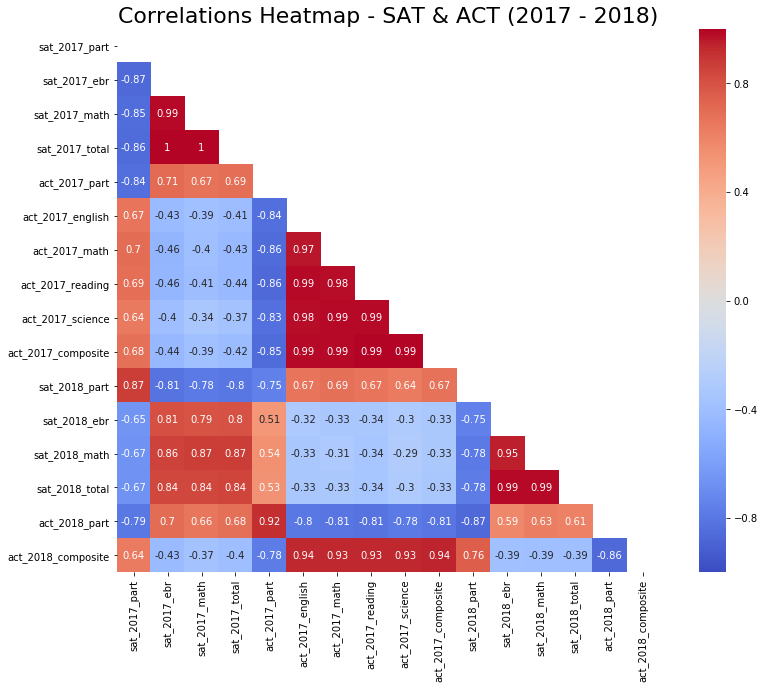

In [99]:
# Adapted from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# create a figure
plt.figure(figsize=(14,10))

# correlations data
corr = final_data.corr()

# Set up mask so triangle at the top is white
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set title
plt.title('Correlations Heatmap - SAT & ACT (2017 - 2018)',fontsize=22)

# create heatmap
sns.heatmap(corr, mask=mask, square=True, annot=True, cmap='coolwarm', vmin=-1, vmax=1);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [100]:
def subplot_histograms(dataframe, list_of_columns, labelx):
      
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    
    fig, ax = plt.subplots(nrows=nrows,
                           ncols=2,
                           figsize=(12, 2.5 * nrows)) # You'll want to specify your figsize
    
    plt.style.use('bmh')
    plt.tight_layout(pad=4)
    
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        
        ax[i].hist(dataframe[column])                                        # creating subplots
        ax[i].set_title(column)                                              # setting title for subplots = columns
        ax[i].set_ylabel('Frequency', fontsize=10)                           # ylabel as frquency
        ax[i].set_xlabel(labelx, fontsize=10)                                # xlabel as test type
        ax[i].axvline(dataframe[column].mean(), color='red', linewidth=1.5)  # vertical line with mean()
        

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

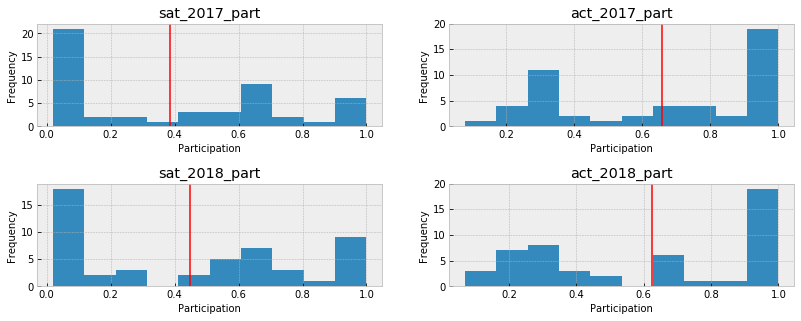

In [121]:
# histograms subplots for Participation SAT & ACT
subplot_histograms(final_data,
                   ['sat_2017_part','act_2017_part','sat_2018_part','act_2018_part'], 'Participation')

**ANSWER**:
Mean Participation increased in the SAT test for 2018 compared to 2017 from 38% to 45%, approximatley. Even though the mean participation increased over the year, there is a considerable amount of states (17) with participations that are lesst than 10%

Mean Participation decreased in the ACT test for 2018 compared to 2017 from 66% to 62%, approximatley. Even though the mean participation decreased over the year, there is only (1) state with participation lower than 10% for both analyzed years.

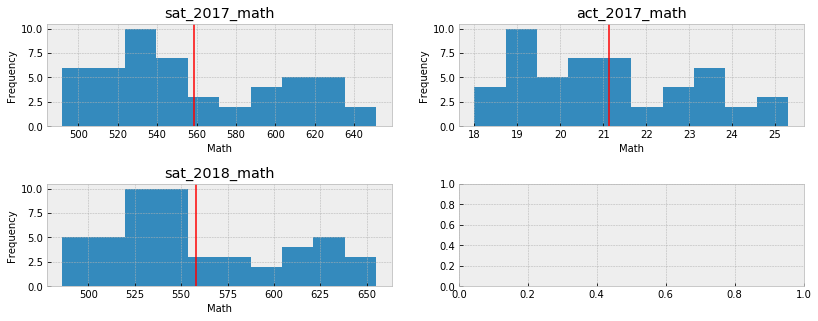

In [102]:
# histograms subplots for Math SAT & ACT
subplot_histograms(final_data,
                   ['sat_2017_math','act_2017_math','sat_2018_math'], 'Math')

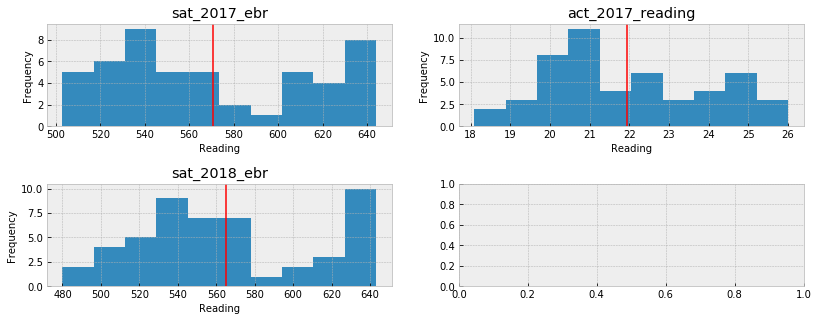

In [103]:
# histograms subplots for Reading SAT & ACT
subplot_histograms(final_data,
                   ['sat_2017_ebr','act_2017_reading','sat_2018_ebr'], 'Reading')

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


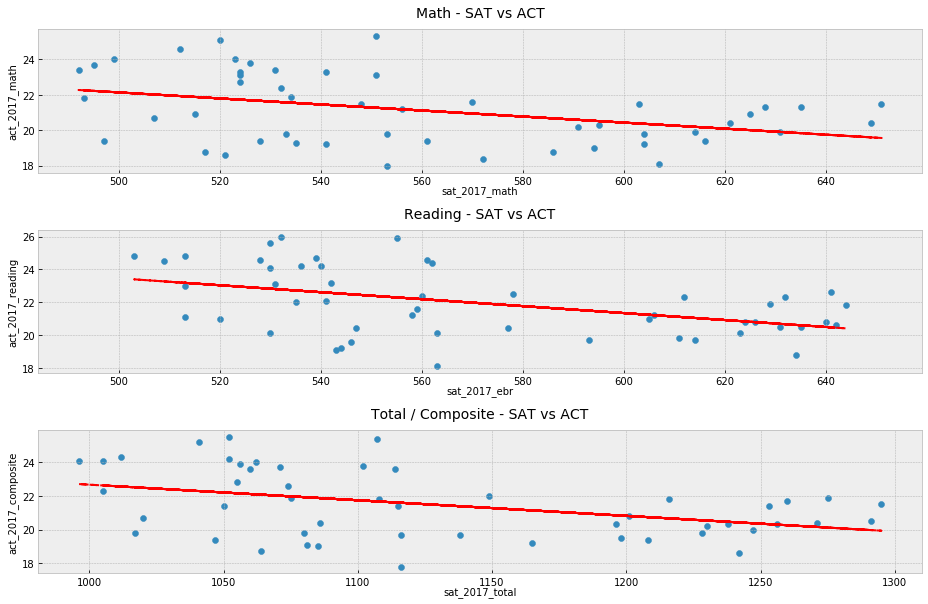

In [104]:
# Establish figure size.
plt.figure(figsize = (13,8.5))

# We can create subplots, which allows us to have multiple subplots in the same plot.
# plt.subplot(311) means we have 3 rows, 1 column, and are referencing plot 1.
ax1 = plt.subplot(311)
ax1.set_title('Math - SAT vs ACT',fontsize=14, pad=12)
ax1.scatter(final_data['sat_2017_math'],final_data['act_2017_math'])
plt.xlabel('sat_2017_math', fontsize=10, labelpad=-1)
plt.ylabel('act_2017_math', fontsize=10)

fit = np.polyfit(final_data['sat_2017_math'], final_data['act_2017_math'], 1)
poly1d = np.poly1d(fit)
plt.plot(final_data['sat_2017_math'],poly1d(final_data['sat_2017_math']),"r--")

# plt.subplot(312) means we have 3 rows, 1 column, and are referencing plot 2.
ax2 = plt.subplot(312, sharex = ax1)
ax2.set_title('Reading - SAT vs ACT',fontsize=14, pad=12)
ax2.scatter(final_data['sat_2017_ebr'],final_data['act_2017_reading'])
plt.xlabel('sat_2017_ebr', fontsize=10, labelpad=-1)
plt.ylabel('act_2017_reading', fontsize=10)

fit = np.polyfit(final_data['sat_2017_ebr'], final_data['act_2017_reading'], 1)
poly1d = np.poly1d(fit)
plt.plot(final_data['sat_2017_ebr'],poly1d(final_data['sat_2017_ebr']),"r--")

# plt.subplot(313) means we have 3 rows, 1 column, and are referencing plot 2.
ax3 = plt.subplot(313)
ax3.set_title('Total / Composite - SAT vs ACT',fontsize=14, pad=12)
ax3.scatter(final_data['sat_2017_total'],final_data['act_2017_composite'])
plt.xlabel('sat_2017_total', fontsize=10, labelpad=-1)
plt.ylabel('act_2017_composite', fontsize=10)

fit = np.polyfit(final_data['sat_2017_total'], final_data['act_2017_composite'], 1)
poly1d = np.poly1d(fit)
plt.plot(final_data['sat_2017_total'],poly1d(final_data['sat_2017_total']),"r--")

plt.tight_layout();

# https://stackoverflow.com/questions/41635448/
# how-can-i-draw-scatter-trend-line-on-matplot-python-pandas?noredirect=1&lq=1

**ANSWER**:
SAT total result and ACT composite results have a negative correlation. This can be seen in all 3 plots above as the trendline follows a downtrend.

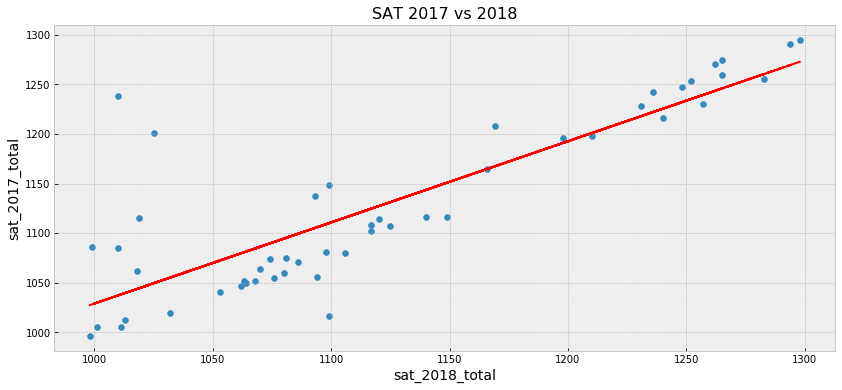

In [105]:
# Establish the size of the figure.
plt.figure(figsize=(14, 6))

# Create scatterplot of high prices versus volume.
plt.scatter(final_data['sat_2018_total'], 
            final_data['sat_2017_total'])

fit = np.polyfit(final_data['sat_2018_total'], final_data['sat_2017_total'], 1)
poly1d = np.poly1d(fit)
plt.plot(final_data['sat_2018_total'],poly1d(final_data['sat_2018_total']),'r--')

plt.title('SAT 2017 vs 2018', fontsize = 16)
plt.ylabel('sat_2017_total', fontsize = 14)
plt.xlabel('sat_2018_total', fontsize = 14);

**ANSWER**:
Total results for the SAT for 2017 exam have a positive correlation with the SAT 2018. In the plot above it is also possible to see a couple outliers: Colorado and Utah.

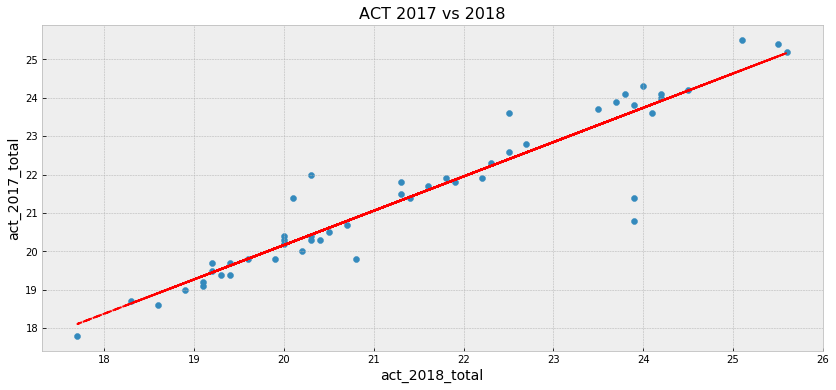

In [106]:
# Establish the size of the figure.
plt.figure(figsize=(14, 6))

# Create scatterplot of high prices versus volume.
plt.scatter(final_data['act_2018_composite'], 
            final_data['act_2017_composite'])

fit = np.polyfit(final_data['act_2018_composite'], final_data['act_2017_composite'], 1)
poly1d = np.poly1d(fit)
plt.plot(final_data['act_2018_composite'],poly1d(final_data['act_2018_composite']),"r--")

plt.title('ACT 2017 vs 2018', fontsize = 16)
plt.ylabel('act_2017_total', fontsize = 14)
plt.xlabel('act_2018_total', fontsize = 14);

**ANSWER**:
Total results for the SAT for 2017 exam have a positive correlation with the SAT 2018. In the plot above it is also possible to see a couple outliers: Colorado and Illinois.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

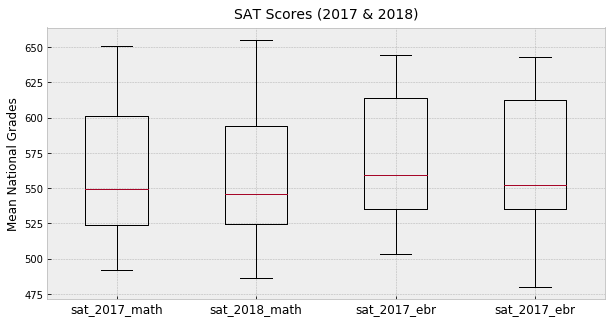

In [107]:
# figure 1 - data

box_1 = final_data['sat_2017_math']
box_2 = final_data['sat_2018_math']
box_3 = final_data['sat_2017_ebr']
box_4 = final_data['sat_2018_ebr']

# combine these different collections into a list    
data_to_plot = [box_1, box_2, box_3, box_4]

# Create a figure instance
fig = plt.figure(figsize=(10, 5))

# creating title
plt.title('SAT Scores (2017 & 2018)',fontsize=14, pad=10)

# Create the boxplot
plt.boxplot(data_to_plot)
plt.xticks([1,2,3,4], ('sat_2017_math','sat_2018_math',
                       'sat_2017_ebr','sat_2017_ebr'), fontsize=12)

plt.ylabel('Mean National Grades', fontsize=12);

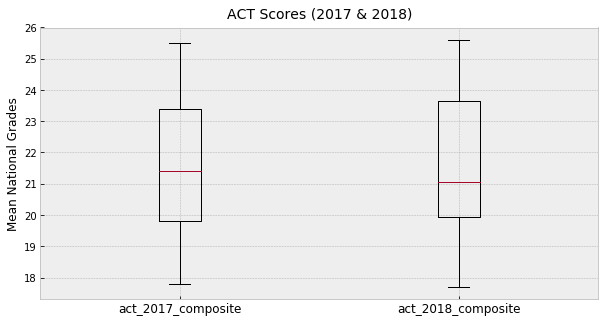

In [108]:
# figure 2 - data

box_1 = final_data['act_2017_composite']
box_2 = final_data['act_2018_composite']

# combine different collections into a list    
data_to_plot = [box_1, box_2]

# Create a figure instance
fig = plt.figure(figsize=(10, 5))

# creating title
plt.title('ACT Scores (2017 & 2018)',fontsize=14, pad=10)

# Create the boxplot
plt.boxplot(data_to_plot)
plt.xticks([1,2], ('act_2017_composite','act_2018_composite'), fontsize=12)

plt.ylabel('Mean National Grades', fontsize=12);

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.
 
 ---

Both SAT and ACT Math scores are positively skewed.

- ACT Math: Mode = 19.4, Median = 20.9, Mean = 21.2 so Mode < Median < Mean
- SAT Math: Mode = 541, Median = 549.5, Mean = 557.54 so Mode < Median < Mean

ACT Science is very close to be normally distributed (a.k.a. symmetric distribution).

- Mode = 20.9, Median = 21.3, Mean = 21.4 so Mode ~ Median ~ Mean

SAT Reading and Writing, ACT English, and ACT Reading are all positively skewed.

- SAT Reading and Writing: Mode = 530, Median = 559, Mean = 569 so Mode < Median < Mean
- ACT English: Mode = 19.5, Median = 20.7, Mean = 20.9 so Mode < Median < Mean
- ACT Reading: Mode = 20.8, Median = 21.8, Mean = 22.0 so Mode < Median < Mean

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

/Users/gabrielperezprieto/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


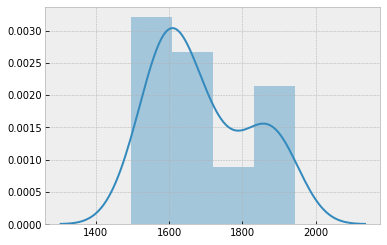

In [111]:
sns.distplot(final_data['sat_2017_total'] + final_data['sat_2018_total'] / 2);

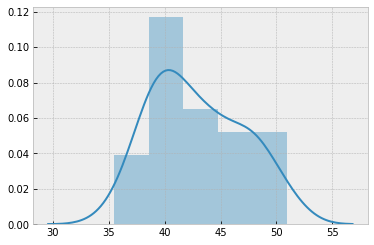

In [112]:
sns.distplot(final_data['act_2017_composite'] + final_data['act_2018_composite']);

**ANSWER**:
By looking at the both distribution plots above that averages the total results for the SAT and ACT we can say that the distributions do not follow a bell shaped curved and are positively skewed, distribution is more concentrated on lower scores rather than higher.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

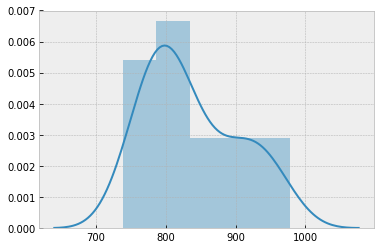

In [113]:
sns.distplot(final_data['sat_2017_math'] + final_data['sat_2018_math'] / 2);

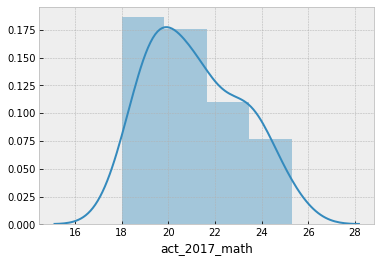

In [114]:
sns.distplot(final_data['act_2017_math']);

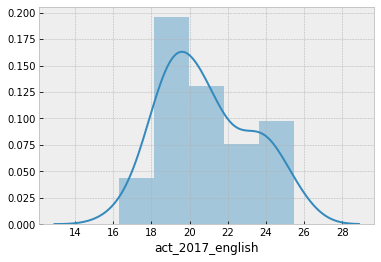

In [115]:
sns.distplot(final_data['act_2017_english']);

**ANSWER**:


#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

**ANSWER**:


##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

**ANSWER**:


#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [116]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

States that require the SAT:
[https://blog.prepscholar.com/which-states-require-the-sat]

State that require the ACT:
[https://www.petersons.com/blog/states-requiring-the-act/]

Colorado:
The state had 100% participation in 2017 also had 100% participation in 2018. But out of the States with 100% participation in 2018, Colorado had a big rate change over the year as it signed to be an obligatory State for the SAT in 2018.
[https://www.testive.com/colorado-sat-change-2017/]

Georgia:
The state is in between regarding taking the SAT and ACT, but leaning towards the SAT for the last year compared with 2017, reducing its average participation in the ACT and increasing the SAT's.

Hawaii:
Interesting fact is that Hawaii had ~50% participation on the SAT for 2017 and 2018, but for the ACT the state had a low participation rate in 2017 and high participation in 2018, still with low scores, not follwing the trend of the lower the participation, the higher the scores are for a given exam.


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [117]:
mask_part = (final_data['sat_2017_part'] > .5) & (final_data['act_2017_part'] > .5)
show_cols = ['state','sat_2017_part','sat_2018_part','act_2017_part','act_2018_part']
final_data[mask_part][show_cols]

,state,sat_2017_part,sat_2018_part,act_2017_part,act_2018_part
8,Florida,0.83,0.56,0.73,0.66
9,Georgia,0.61,0.70,0.55,0.53
10,Hawaii,0.55,0.56,0.90,0.89


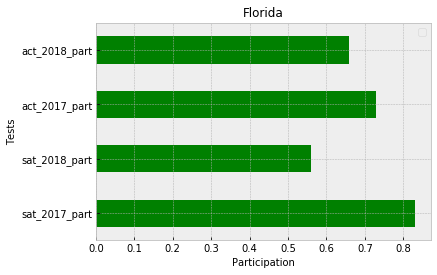

In [118]:
florida = final_data[final_data['state'] == 'Florida'][['sat_2017_part', 'sat_2018_part',
                                                        'act_2017_part','act_2018_part']].T
florida
florida.plot(kind='barh', color='green')
plt.title('Florida', size=12)
plt.xlabel('Participation', size=10)
plt.ylabel('Tests', size=10)
plt.legend('');


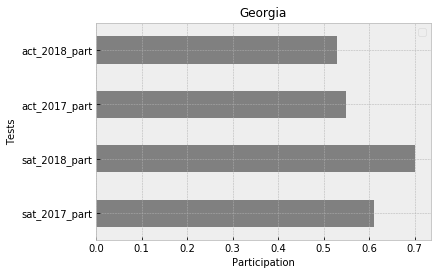

In [119]:
georgia = final_data[final_data['state'] == 'Georgia'][['sat_2017_part', 'sat_2018_part',
                                                        'act_2017_part','act_2018_part']].T

georgia.plot(kind='barh', color='grey')
plt.title('Georgia', size=12)
plt.xlabel('Participation', size=10)
plt.ylabel('Tests', size=10)
plt.legend('');


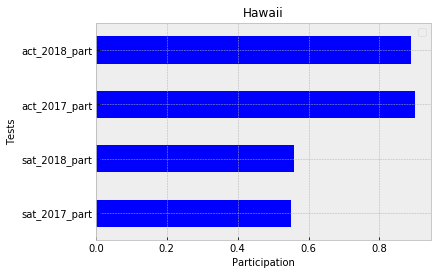

In [120]:
hawaii = final_data[final_data['state'] == 'Hawaii'][['sat_2017_part', 'sat_2018_part',
                                                        'act_2017_part','act_2018_part']].T

hawaii.plot(kind='barh', color='blue')
plt.title('Hawaii', size=12)
plt.xlabel('Participation', size=10)
plt.ylabel('Tests', size=10)
plt.legend('');


**ANSWER**:
Strategy: Focus on states that are not fully with either SAT or ACT, regarding their 'preferred' exam.

Choice of State: Florida
Population = 21.3 Million | 3rd on the list of most populated states in the country [https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population]

Florida's Participation 2017:
SAT = .83
ACT = .73

Florida's Participation 2018:
SAT = .56
ACT = .66

The participation rate for both tests decreased from 2017 to 2018 making the state one of the states that are in between taking the SAT or the ACT.

The state is the 3rd most populated state in the United States making it a great candidate for a targeted marketing campaign. Moreover Florida is the 5th state in total number of colleges in the United States.
[https://www.statista.com/statistics/306880/us-higher-education-institutions-by-state/]

Another benefit of choosing Florida is that it borders another state that is in between taking the SAT and the ACT: Georgia, and having an impact in Florida might induce an impact in Georgia's college systems.

Florida is scoring under the national average for the total SAT score and the composite ACT score. The campaign could reinforce the importance of the test to college students and institutions in order to get more people to take the test.



